## **Camvid Dataset Segmentation**

In [ ]:
#Raj Kumar Surana
#IIT Hyderabad
#Smart Mobility

# **Imports , Seed and mounting Drive**

In [ ]:
import torch
import numpy as np
import os
import random
from PIL import Image 
from PIL import Image as im
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from tqdm.notebook import tqdm
seed=1234
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    #torch.backends.cudnn.deterministic = True
seed_everything()

In [ ]:
!nvidia-smi

Tue Jul 13 08:47:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Data Download and File handling**

In [ ]:
os.chdir("/content/gdrive/MyDrive/datasets/camvid")
os.getcwd()

'/content/gdrive/MyDrive/datasets/camvid'

In [ ]:
!ls

class_dict.csv	images	label_colorsSorted.txt	labels	tmp.png


In [ ]:
#os.mkdir("./images")

In [ ]:
#! wget http://web4.cs.ucl.ac.uk/staff/g.brostow/MotionSegRecData/files/701_StillsRaw_full.zip

In [ ]:
#!unzip 701_StillsRaw_full.zip -d images

In [ ]:
#os.chdir("/content/gdrive/MyDrive/datasets/camvid")
#os.mkdir("./labels")

In [ ]:
#!wget http://web4.cs.ucl.ac.uk/staff/g.brostow/MotionSegRecData/data/LabeledApproved_full.zip

In [ ]:
#!unzip LabeledApproved_full.zip -d labels

In [ ]:
#!wget http://web4.cs.ucl.ac.uk/staff/g.brostow/MotionSegRecData/data/label_colorsSorted.txt

In [ ]:
# !ls

In [ ]:
# !rm 701_*

In [ ]:
# !rm Labeled*

In [ ]:
# !ls

In [ ]:
#os.chdir("./images")

In [ ]:
#!ls 701* | wc -l

701


In [ ]:
#!ls

701_StillsRaw_full


# **Data Visualization**

In [ ]:
os.chdir("/content/gdrive/MyDrive/datasets/camvid")

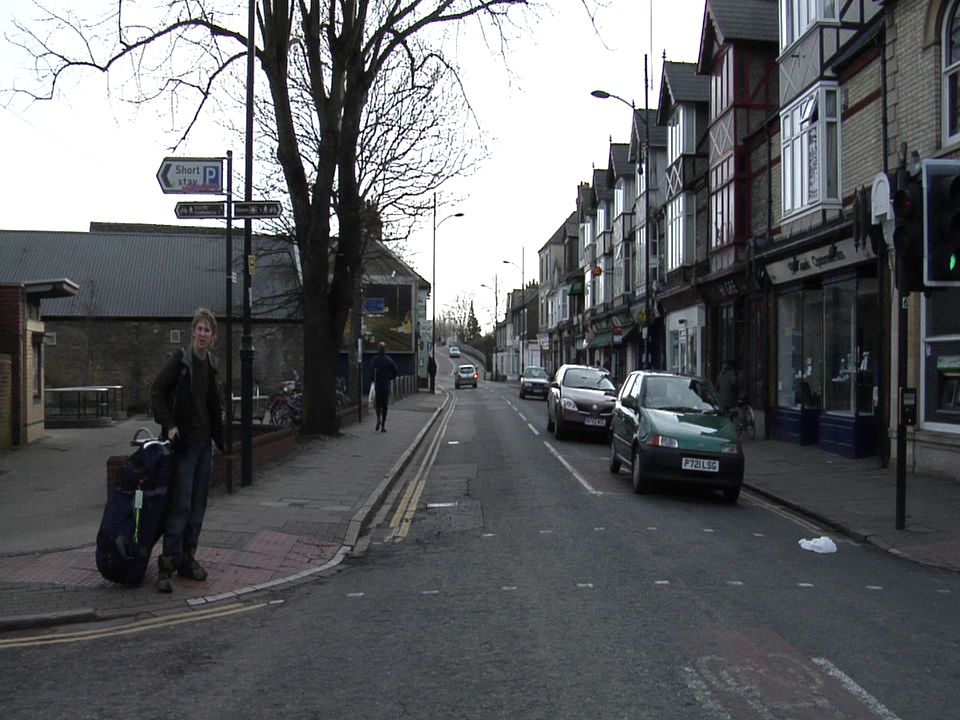

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
im_cv = cv2.imread("./images/701_StillsRaw_full/Seq05VD_f03000.png")
#im_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)
cv2_imshow(im_cv)


In [ ]:
!ls

class_dict.csv	label_colorsSorted.txt	tmp.png
images		labels			UNet20_crossentropy_camvid.pth


(720, 960, 3)


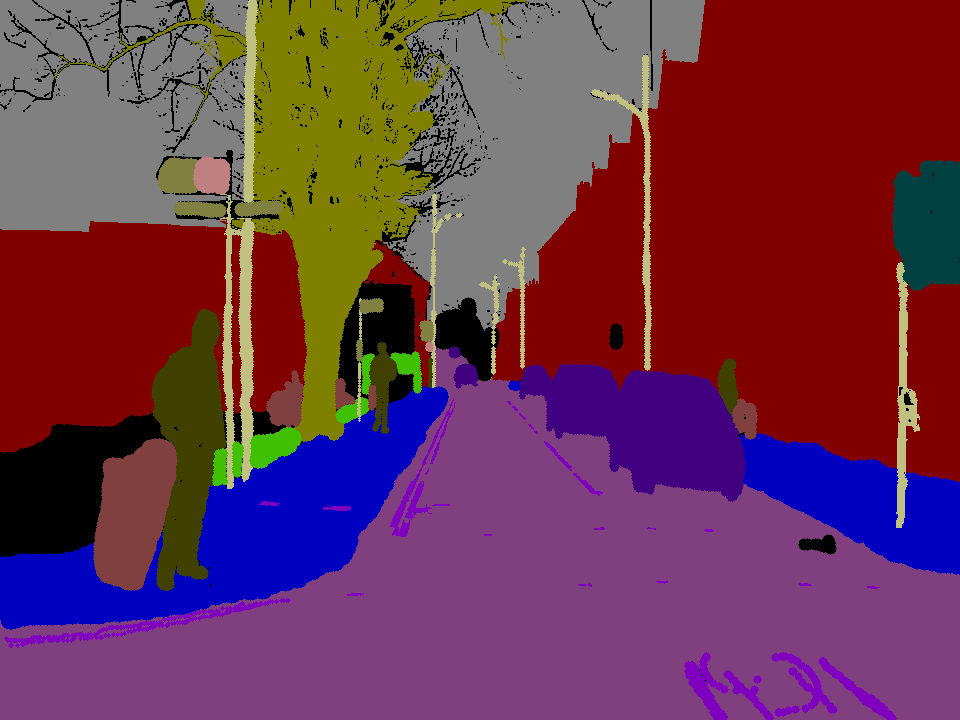

In [ ]:

im_cv = cv2.imread("./labels/Seq05VD_f03000_L.png")
print(im_cv.shape)
#im_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)
cv2_imshow(im_cv)

# **Train Test and Validation split**

In [ ]:
main_dir="/content/gdrive/MyDrive/datasets/camvid"
image_dir="/images/701_StillsRaw_full/"
label_dir="/labels/"

In [ ]:

image_names=os.listdir(main_dir+image_dir)

In [ ]:
label_names=[image_names[i].split(".")[0]+"_L."+image_names[i].split(".")[1] for i in range(len(image_names))]

In [ ]:
label_names[0]

'Seq05VD_f00000_L.png'

In [ ]:
image_names[0]

'Seq05VD_f00000.png'

In [ ]:

os.chdir("/content/gdrive/MyDrive/datasets/camvid")
!pwd

/content/gdrive/MyDrive/datasets/camvid


In [ ]:
len(label_names)

701

In [ ]:
mains=range(len(label_names))

In [ ]:
mains[700]

700

In [ ]:
#import numpy as np
mains2=np.array(mains)
np.random.shuffle(mains2)
#367 images for training, 101 for validation and 233 for testing

In [ ]:
training=mains2[0:367]
validation=mains2[367:478]
testing=mains2[478:]

In [ ]:
training_images=[main_dir+image_dir+image_names[i] for i in list(training)]
training_labels=[main_dir+label_dir+label_names[i] for i in list(training)]

In [ ]:
validation_images=[main_dir+image_dir+image_names[i] for i in list(validation)]
validation_labels=[main_dir+label_dir+label_names[i] for i in list(validation)]

In [ ]:
testing_images=[main_dir+image_dir+image_names[i] for i in list(testing)]
testing_labels=[main_dir+label_dir+label_names[i] for i in list(testing)]

In [ ]:
image1=im.open(training_labels[0])
image2=im.open(training_images[0])
print(training_labels[1])
print(training_labels[0])
print(validation_labels[1])
print(validation_labels[4])
print(testing_labels[1])
print(testing_labels[9])
# display(image1)
# display(image2)
array_image1=np.array(image1)
array_image1.shape

/content/gdrive/MyDrive/datasets/camvid/labels/0006R0_f02700_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/0016E5_07410_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/0001TP_008400_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/Seq05VD_f04860_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/0016E5_08007_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/Seq05VD_f04710_L.png


(720, 960, 3)

/content/gdrive/MyDrive/datasets/camvid/labels/0006R0_f02700_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/0016E5_07410_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/0001TP_008400_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/Seq05VD_f04860_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/0016E5_08007_L.png
/content/gdrive/MyDrive/datasets/camvid/labels/Seq05VD_f04710_L.png

# **csv file labelling**

In [ ]:
csv_path="/content/gdrive/MyDrive/datasets/camvid/class_dict.csv"

In [ ]:
import csv
def get_label_info(csv_path):
  class_names = []
  label_values = []
  with open(csv_path, 'r') as csvfile:
    file_reader = csv.reader(csvfile, delimiter=',')
    header = next(file_reader)
    for row in file_reader:
      class_names.append(row[0])
      label_values.append([int(row[1]), int(row[2]), int(row[3])])
    # print(class_dict)
  return class_names, label_values

In [ ]:
class_names,label_names=get_label_info(csv_path)

In [ ]:
len(class_names)

32

In [ ]:
# class_names
label_names

[[64, 128, 64],
 [192, 0, 128],
 [0, 128, 192],
 [0, 128, 64],
 [128, 0, 0],
 [64, 0, 128],
 [64, 0, 192],
 [192, 128, 64],
 [192, 192, 128],
 [64, 64, 128],
 [128, 0, 192],
 [192, 0, 64],
 [128, 128, 64],
 [192, 0, 192],
 [128, 64, 64],
 [64, 192, 128],
 [64, 64, 0],
 [128, 64, 128],
 [128, 128, 192],
 [0, 0, 192],
 [192, 128, 128],
 [128, 128, 128],
 [64, 128, 192],
 [0, 0, 64],
 [0, 64, 64],
 [192, 64, 128],
 [128, 128, 0],
 [192, 128, 192],
 [64, 0, 64],
 [192, 192, 0],
 [0, 0, 0],
 [64, 192, 0]]

In [ ]:
colors=[ np.reshape(np.array(label, dtype='uint8'), (1, 1, 3)) for label in label_names]

In [ ]:
def class_pixel(label_img):
  class_pix = np.zeros([720, 960, 1], dtype = int)
  for index, c in enumerate(colors):
    class_pix[np.all(label_img == c, axis=2)] = index
  return class_pix

In [ ]:
array_label1=class_pixel(array_image1)

In [ ]:
array_label1.shape

(720, 960, 1)

In [ ]:
np.count_nonzero(array_label1)

691200

In [ ]:
720*960

691200

# **Defining Dataset Dataloaders and Model**

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device = torch.device(device)
print(device)

cuda:0


In [ ]:
!nvidia-smi

Tue Jul 13 08:48:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
class CamDataset(Dataset):

  def __init__(self, image_dir, label_dir):
    self.image_dir = image_dir
    self.label_dir = label_dir
    

  def __len__(self):
    return len(self.image_dir)
  
  def __getitem__(self, index):
    image_fn = self.image_dir[index]
    image = Image.open(image_fn) #.convert("RGB")
    image = np.array(image)

    label_fn = self.label_dir[index]
    label=Image.open(label_fn) #.convert("RGB")
    label=np.array(label)

    label= class_pixel(label)
    label= torch.Tensor(label).long()
    label=torch.squeeze(label)
    image = self.transform(image)
    return image, label

  def transform(self, image):
    transform_ops = transforms.Compose([
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=(0.485, 0.56, 0.406), std=(0.229, 0.224, 0.225))
    ])
    return transform_ops(image)

In [ ]:
train_dataset = CamDataset(training_images,training_labels)
val_dataset= CamDataset(validation_images,validation_labels)
print(len(train_dataset))
print(len(val_dataset))

367
111


In [ ]:
camImage, label_class = train_dataset[0]
print(camImage.shape, label_class.shape)
# label=100
# label2=-1

# for _,labels in train_dataset:
#   labels=labels.to(device)
#   label=100
#   label2=-1
#   label=min(label,labels.min())
#   label2=max(label2,labels.max())

#   print(label)
#   print(label2)

torch.Size([3, 720, 960]) torch.Size([720, 960])


In [ ]:
label_class.dtype

torch.int64

In [ ]:
class UNet(nn.Module):
    
    def __init__(self, num_classes):
        super(UNet, self).__init__()
        self.num_classes = num_classes
        self.contracting_11 = self.conv_block(in_channels=3, out_channels=64)
        self.contracting_12 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_21 = self.conv_block(in_channels=64, out_channels=128)
        self.contracting_22 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_31 = self.conv_block(in_channels=128, out_channels=256)
        self.contracting_32 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_41 = self.conv_block(in_channels=256, out_channels=512)
        self.contracting_42 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.middle = self.conv_block(in_channels=512, out_channels=1024)
        self.expansive_11 = nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_12 = self.conv_block(in_channels=1024, out_channels=512)
        self.expansive_21 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_22 = self.conv_block(in_channels=512, out_channels=256)
        self.expansive_31 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_32 = self.conv_block(in_channels=256, out_channels=128)
        self.expansive_41 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_42 = self.conv_block(in_channels=128, out_channels=64)
        self.output = nn.Conv2d(in_channels=64, out_channels=num_classes, kernel_size=3, stride=1, padding=1)
        
    def conv_block(self, in_channels, out_channels):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels),
                                    nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels))
        return block
    
    def forward(self, X):
        contracting_11_out = self.contracting_11(X) # [-1, 64, 256, 256]
        contracting_12_out = self.contracting_12(contracting_11_out) # [-1, 64, 128, 128]
        contracting_21_out = self.contracting_21(contracting_12_out) # [-1, 128, 128, 128]
        contracting_22_out = self.contracting_22(contracting_21_out) # [-1, 128, 64, 64]
        contracting_31_out = self.contracting_31(contracting_22_out) # [-1, 256, 64, 64]
        contracting_32_out = self.contracting_32(contracting_31_out) # [-1, 256, 32, 32]
        contracting_41_out = self.contracting_41(contracting_32_out) # [-1, 512, 32, 32]
        contracting_42_out = self.contracting_42(contracting_41_out) # [-1, 512, 16, 16]
        middle_out = self.middle(contracting_42_out) # [-1, 1024, 16, 16]
        expansive_11_out = self.expansive_11(middle_out) # [-1, 512, 32, 32]
        expansive_12_out = self.expansive_12(torch.cat((expansive_11_out, contracting_41_out), dim=1)) # [-1, 1024, 32, 32] -> [-1, 512, 32, 32]
        expansive_21_out = self.expansive_21(expansive_12_out) # [-1, 256, 64, 64]
        expansive_22_out = self.expansive_22(torch.cat((expansive_21_out, contracting_31_out), dim=1)) # [-1, 512, 64, 64] -> [-1, 256, 64, 64]
        expansive_31_out = self.expansive_31(expansive_22_out) # [-1, 128, 128, 128]
        expansive_32_out = self.expansive_32(torch.cat((expansive_31_out, contracting_21_out), dim=1)) # [-1, 256, 128, 128] -> [-1, 128, 128, 128]
        expansive_41_out = self.expansive_41(expansive_32_out) # [-1, 64, 256, 256]
        expansive_42_out = self.expansive_42(torch.cat((expansive_41_out, contracting_11_out), dim=1)) # [-1, 128, 256, 256] -> [-1, 64, 256, 256]
        output_out = self.output(expansive_42_out) # [-1, num_classes, 256, 256]
        return output_out

In [ ]:
batch_s = 2
epochs = 15
lr = 0.01

In [ ]:
train_data_loader = DataLoader(train_dataset, batch_size = batch_s)
val_data_loader = DataLoader(val_dataset, batch_size = batch_s)
print(len(train_dataset), len(train_data_loader))
print(len(val_dataset),len(val_data_loader))
X, Y = iter(train_data_loader).next()
print(X.shape, Y.shape)

367 184
111 56
torch.Size([2, 3, 720, 960]) torch.Size([2, 720, 960])


# **Only when training**

In [ ]:
model = UNet(num_classes = 32).to(device)

#model = UNet(num_classes = num_classes).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [ ]:
!nvidia-smi

Thu Jul  8 02:42:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    32W /  70W |   1220MiB / 15109MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Training**

In [ ]:
def trainer(model,train_data_loader,criterion,optimizer,device):
  model.train()
  epoch_loss=0
  for X,Y in tqdm(train_data_loader, total=len(train_data_loader),leave=False):
    X, Y= X.to(device), Y.to(device)
    optimizer.zero_grad()
    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    loss.backward()
    optimizer.step()
    epoch_loss+= (loss.item()*X.size(0))
  
  return (epoch_loss/len(train_data_loader.sampler))



In [ ]:
def tester(model,val_data_loader,criterion,device):
  model.eval()
  val_epoch_loss=0
  with torch.no_grad():
    for x,y in tqdm(val_data_loader, total=len(val_data_loader),leave=False):
      x,y=x.to(device), y.to(device)
      y_pred=model(x)
      loss=criterion(y_pred,y)
      val_epoch_loss+=(loss.item()*x.size(0))
    return (val_epoch_loss/len(val_data_loader.sampler))

367

In [ ]:
train_losses=[]
val_losses=[]

for epoch in tqdm(range(epochs)):
  epoch_loss = 0
  train_loss=trainer(model,train_data_loader,criterion,optimizer,device)
  val_loss=tester(model,val_data_loader,criterion,device)
  print("train loss : {} after {}".format(train_loss,(epoch+1)))
  print("val loss : {} after {}".format(val_loss,(epoch+1)))
  train_losses.append(train_loss)
  val_losses.append(val_loss)





train loss : 1.1286419175301325 after 1
val loss : 1.3635906958365225 after 1


train loss : 1.0717324703850604 after 2
val loss : 1.3786926237312522 after 2


train loss : 1.0167371229514763 after 3
val loss : 1.3121645364675436 after 3


train loss : 0.9527117463808293 after 4
val loss : 1.4399842517869967 after 4


train loss : 0.899209861209672 after 5
val loss : 1.5778313585229822 after 5


train loss : 0.8476634243203769 after 6
val loss : 1.1195744984858744 after 6


train loss : 0.8132853053246272 after 7
val loss : 1.1866251536317773 after 7


train loss : 0.7953363535189824 after 8
val loss : 1.10108653865419 after 8


train loss : 0.790636737437599 after 9
val loss : 0.9434927116643201 after 9


train loss : 0.7240843077771345 after 10
val loss : 0.9889834098987751 after 10


train loss : 0.6882849418499815 after 11
val loss : 0.9889098346770346 after 11


train loss : 0.6659158837730293 after 12
val loss : 0.8236886338070706 after 12


train loss : 0.6439895979065337 after 13
val loss : 0.8973625066044094 after 13


train loss : 0.6187671463560993 after 14
val loss : 1.0043041566470723 after 14


train loss : 0.6102386030903953 after 15
val loss : 1.133253434219876 after 15



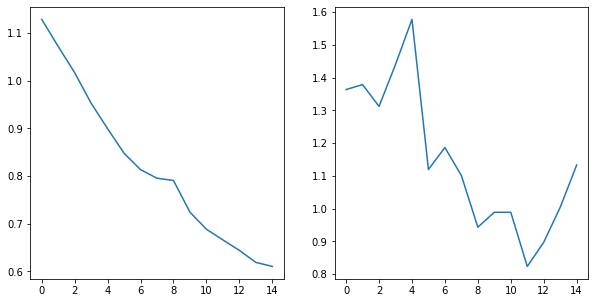

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(train_losses)
axes[1].plot(val_losses)

In [ ]:
root_path="/content/gdrive/MyDrive/datasets/camvid/"

In [ ]:
model_name = "UNet20_crossentropy_camvid.pth"

torch.save(model.state_dict(), root_path + model_name)

In [ ]:
#/content/gdrive/MyDrive/datasets/camvid/UNet20_crossentropy_camvid.pth

# **Checking Model predictions**

In [ ]:
root_path="/content/gdrive/MyDrive/datasets/camvid/"
model_name = "UNet20_crossentropy_camvid.pth"
model_path = root_path + model_name
model_ = UNet(num_classes = 32).to(device)
model_.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
test_batch_size = 2
dataset = CamDataset(testing_images,testing_labels)
data_loader = DataLoader(dataset, batch_size=test_batch_size)

In [ ]:
inverse_transform = transforms.Compose([
    transforms.Normalize((-0.485/0.229, -0.456/0.224, -0.406/0.225), (1/0.229, 1/0.224, 1/0.225))
])
color_code=np.array(label_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 960, 3)
(720, 960, 3)


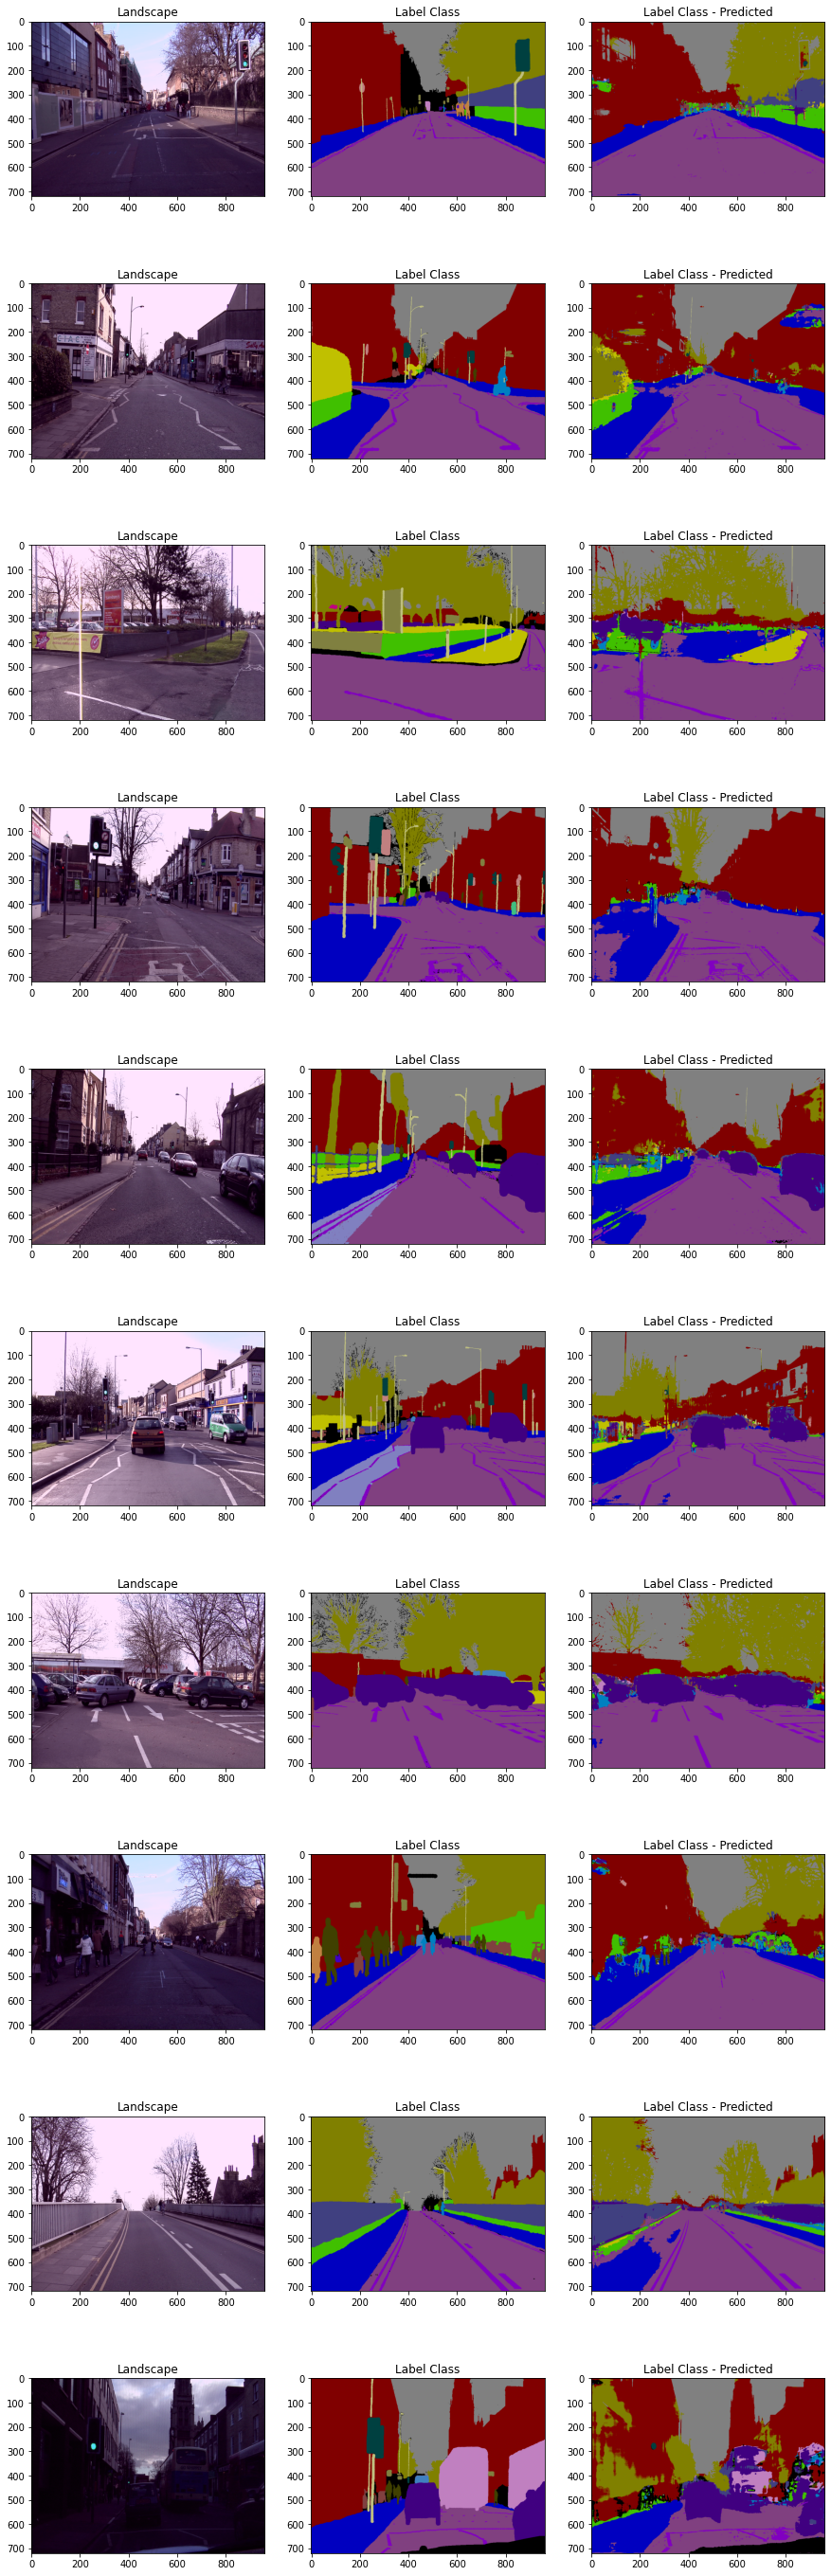

In [ ]:
number=5
fig, axes = plt.subplots(test_batch_size*number, 3, figsize=(3*5, test_batch_size*5*number))
iter_data=iter(data_loader)
for i in range(test_batch_size*number):
    X,Y = next(iter_data)
    X,Y = X.to(device), Y.to(device)
    Y_pred = model_(X)
    Y_pred = torch.argmax(Y_pred, dim=1)
    
    landscape = inverse_transform(X[i%test_batch_size]).permute(1,2,0).cpu().detach().numpy() #permute(1, 2, 0) before cpu
    label_class = Y[i%test_batch_size].cpu().detach().numpy()
    label_class_predicted = Y_pred[i%test_batch_size].cpu().detach().numpy()
    axes[i, 0].imshow(landscape)
    axes[i, 0].set_title("Landscape")
    
    label_class= color_code[label_class.astype(int)]
    axes[i, 1].imshow(label_class)
    print(label_class.shape)
    axes[i, 1].set_title("Label Class")
    label_class_predicted=color_code[label_class_predicted.astype(int)]
    axes[i, 2].imshow(label_class_predicted)
    print(label_class_predicted.shape)
    axes[i, 2].set_title("Label Class - Predicted")

In [ ]:
class Metric(object):
    """Base class for all metrics.
    From: https://github.com/pytorch/tnt/blob/master/torchnet/meter/meter.py
    """
    def reset(self):
        pass

    def add(self):
        pass

    def value(self):
        pass

class ConfusionMatrix(Metric):
    """Constructs a confusion matrix for a multi-class classification problems.
    Does not support multi-label, multi-class problems.
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem.
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    Modified from: https://github.com/pytorch/tnt/blob/master/torchnet/meter/confusionmeter.py
    """

    def __init__(self, num_classes, normalized=False):
        super().__init__()

        self.conf = np.ndarray((num_classes, num_classes), dtype=np.int64)
        self.normalized = normalized
        self.num_classes = num_classes
        self.reset()

    def reset(self):
        self.conf.fill(0)

    def add(self, predicted, target):
        """Computes the confusion matrix
        The shape of the confusion matrix is K x K, where K is the number
        of classes.
        Keyword arguments:
        - predicted (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        predicted scores obtained from the model for N examples and K classes,
        or an N-tensor/array of integer values between 0 and K-1.
        - target (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        ground-truth classes for N examples and K classes, or an N-tensor/array
        of integer values between 0 and K-1.
        """
        # If target and/or predicted are tensors, convert them to numpy arrays
        if torch.is_tensor(predicted):
            predicted = predicted.cpu().numpy()
        if torch.is_tensor(target):
            target = target.cpu().numpy()

        assert predicted.shape[0] == target.shape[0], \
            'number of targets and predicted outputs do not match'

        if np.ndim(predicted) != 1:
            assert predicted.shape[1] == self.num_classes, \
                'number of predictions does not match size of confusion matrix'
            predicted = np.argmax(predicted, 1)
        else:
            assert (predicted.max() < self.num_classes) and (predicted.min() >= 0), \
                'predicted values are not between 0 and k-1'

        if np.ndim(target) != 1:
            assert target.shape[1] == self.num_classes, \
                'Onehot target does not match size of confusion matrix'
            assert (target >= 0).all() and (target <= 1).all(), \
                'in one-hot encoding, target values should be 0 or 1'
            assert (target.sum(1) == 1).all(), \
                'multi-label setting is not supported'
            target = np.argmax(target, 1)
        else:
            assert (target.max() < self.num_classes) and (target.min() >= 0), \
                'target values are not between 0 and k-1'

        # hack for bincounting 2 arrays together
        x = predicted + self.num_classes * target
        bincount_2d = np.bincount(
            x.astype(np.int64), minlength=self.num_classes**2)
        assert bincount_2d.size == self.num_classes**2
        conf = bincount_2d.reshape((self.num_classes, self.num_classes))

        self.conf += conf

    def value(self):
        """
        Returns:
            Confustion matrix of K rows and K columns, where rows corresponds
            to ground-truth targets and columns corresponds to predicted
            targets.
        """
        if self.normalized:
            conf = self.conf.astype(np.float32)
            return conf / conf.sum(1).clip(min=1e-12)[:, None]
        else:
            return self.conf

class IoU(Metric):
    """Computes the intersection over union (IoU) per class and corresponding
    mean (mIoU).
    Intersection over union (IoU) is a common evaluation metric for semantic
    segmentation. The predictions are first accumulated in a confusion matrix
    and the IoU is computed from it as follows:
        IoU = true_positive / (true_positive + false_positive + false_negative).
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    - ignore_index (int or iterable, optional): Index of the classes to ignore
    when computing the IoU. Can be an int, or any iterable of ints.
    """

    def __init__(self, num_classes, normalized=False, ignore_index=None):
        super().__init__()
        self.conf_metric = ConfusionMatrix(num_classes, normalized)

        if ignore_index is None:
            self.ignore_index = None
        elif isinstance(ignore_index, int):
            self.ignore_index = (ignore_index,)
        else:
            try:
                self.ignore_index = tuple(ignore_index)
            except TypeError:
                raise ValueError("'ignore_index' must be an int or iterable")

    def reset(self):
        self.conf_metric.reset()

    def add(self, predicted, target):
        """Adds the predicted and target pair to the IoU metric.
        Keyword arguments:
        - predicted (Tensor): Can be a (N, K, H, W) tensor of
        predicted scores obtained from the model for N examples and K classes,
        or (N, H, W) tensor of integer values between 0 and K-1.
        - target (Tensor): Can be a (N, K, H, W) tensor of
        target scores for N examples and K classes, or (N, H, W) tensor of
        integer values between 0 and K-1.
        """
        # Dimensions check
        assert predicted.size(0) == target.size(0), \
            'number of targets and predicted outputs do not match'
        assert predicted.dim() == 3 or predicted.dim() == 4, \
            "predictions must be of dimension (N, H, W) or (N, K, H, W)"
        assert target.dim() == 3 or target.dim() == 4, \
            "targets must be of dimension (N, H, W) or (N, K, H, W)"

        # If the tensor is in categorical format convert it to integer format
        if predicted.dim() == 4:
            _, predicted = predicted.max(1)
        if target.dim() == 4:
            _, target = target.max(1)

        #print(predicted.view(-1).shape)
        self.conf_metric.add(predicted.view(-1), target.view(-1))

    def value(self):
        """Computes the IoU and mean IoU.
        The mean computation ignores NaN elements of the IoU array.
        Returns:
            Tuple: (IoU, mIoU). The first output is the per class IoU,
            for K classes it's numpy.ndarray with K elements. The second output,
            is the mean IoU.
        """
        conf_matrix = self.conf_metric.value()
        #print(conf_matrix.shape)
        if self.ignore_index is not None:
            conf_matrix[:, self.ignore_index] = 0
            conf_matrix[self.ignore_index, :] = 0
        true_positive = np.diag(conf_matrix)
        false_positive = np.sum(conf_matrix, 0) - true_positive
        false_negative = np.sum(conf_matrix, 1) - true_positive

        # Just in case we get a division by 0, ignore/hide the error
        with np.errstate(divide='ignore', invalid='ignore'):
            iou = true_positive / (true_positive + false_positive + false_negative)

        return iou, np.nanmean(iou)

In [ ]:
result=IoU(32)
test_batch_size=2

count=0;
with torch.no_grad():
  for X,Y in tqdm(data_loader, total=len(data_loader), leave = False):
    X, Y = X.to(device), Y.to(device)
    Y_pred = model_(X)
    result.add(Y,Y_pred)
    count+=1;



In [ ]:
final,means=result.value()
print(final)
print(means)

[0.         0.         0.22396408 0.         0.68922546 0.62772774
 0.         0.         0.03192246 0.24076297 0.51085743 0.
 0.04827108 0.         0.08947821 0.         0.07453391 0.89324488
 0.         0.69016112 0.02751581 0.86590948 0.         0.
 0.02751519        nan 0.65083213 0.08841114        nan 0.22886803
 0.17426481 0.27937857]
0.2154281500734945


In [ ]:
for i in range(len(final)):
  print(f"{class_names[i]} : {final[i]}")

Animal : 0.0
Archway : 0.0
Bicyclist : 0.2239640843842622
Bridge : 0.0
Building : 0.6892254598177958
Car : 0.6277277395242344
CartLuggagePram : 0.0
Child : 0.0
Column_Pole : 0.03192246399326471
Fence : 0.2407629666524643
LaneMkgsDriv : 0.5108574328223935
LaneMkgsNonDriv : 0.0
Misc_Text : 0.04827107667399098
MotorcycleScooter : 0.0
OtherMoving : 0.08947821041933267
ParkingBlock : 0.0
Pedestrian : 0.0745339076778755
Road : 0.893244877197224
RoadShoulder : 0.0
Sidewalk : 0.6901611245008418
SignSymbol : 0.027515807692550645
Sky : 0.865909481170988
SUVPickupTruck : 0.0
TrafficCone : 0.0
TrafficLight : 0.02751518666131179
Train : nan
Tree : 0.6508321288610757
Truck_Bus : 0.08841113856259432
Tunnel : nan
VegetationMisc : 0.22886803390545082
Void : 0.17426481157759918
Wall : 0.2793785701095842


In [ ]:
# test_batch_size=2
# iou_scores=[]
# final= np.zeros(labels)
# count=0;
# with torch.no_grad():
#   for X,Y in tqdm(data_loader, total=len(data_loader), leave = False):
#     X, Y = X.to(device), Y.to(device)
#     Y_pred = model_(X)
#     #print(Y_pred.shape)
#     final=np.add(final,mIOU(Y,Y_pred))
#     count+=1
#     break


###################################################

# one= np.array(((0,1,1,1,1,1,0),(1,1,1,1,0,0,0)))
# two= np.array(((1,0,1,0,1,0,1),(1,1,1,0,1,1,0)))
# tp= np.sum((one==1)& (two==1))
# fp= np.sum((one==1)& (two!=1))
# fn= np.sum((one!=1)& (two==1))
# print(tp)
# print(fp)
# print(fn)

####################################################

# #fig, axes = plt.subplots(test_batch_size, 3, figsize=(3*5, test_batch_size*5))
# final= np.zeros(labels)
# count=0
# for i in range(test_batch_size):
#     X,Y = next(iter(data_loader))
#     X,Y = X.to(device), Y.to(device)
#     #Y_pred = model_(X)
#     #Y_pred = torch.argmax(Y_pred, dim=1)
#     final=np.add(final,mIOU(label_class,label_class))
#     count+=1

# print(final/count)

###############################################################

# test_batch_size=2
# count=0;
# with torch.no_grad():
#   for X,Y in tqdm(data_loader, total=len(data_loader), leave = False):
#     X, Y = X.to(device), Y.to(device)
#     Y_pred = model_(X)
#     #print(Y_pred.shape)
#     mIOU(Y,Y_pred)
#     count+=1

# newlist= (np.mean(np.array(ioulist),axis=1))
# print(newlist)
    
